Enter your income: 85000
Enter your state's abbreviation: tx

Average expected yearly expenditures:
   Federal Income Tax of $9509.28
   State Income Tax of $0.00
   Average health insurance of $5232.00
   Average rent of $12540.00
   and rental insurance of $197.00
   Average car insurance and maintenance of $909.00
   Average gas cost of $1500.00
   Average grocery cost of $3000.00


Leaving you with a projected $52112.72

This amounts to $4342.73 left over per month to do with as you please.
The recommended amount to be anywhere between 15% and 25%
This would be between $651.41 and $1085.68


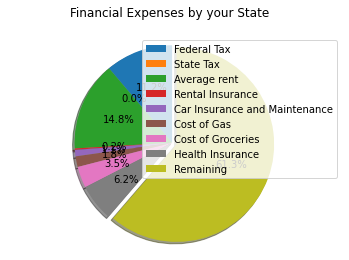

In [18]:
########### START HERE ############

# The program we have created is meant to help individuals categorize
# fincancial spending and set monthly financial goals.
# The sample data used in this project was example data taken from verious sources.
# We used the average data from 2021 to calculate the amount of
# spending money someomne is likely to have based on their income and state.

# We hard-coded federal tax values as they stay the same regardless of state and are only based off of income.
# the function will take in the individual's income and return the federal tax on the income.
import matplotlib.pyplot as plt
import sys

def fedTax(income):
    tax = 0
    if income > 523600:
        income -= 523600
        tax = 157804 + income * .37
    elif income > 209425:
        income -= 209425
        tax = 474783 + income * .35
    elif income > 164926:
        income -= 164926
        tax = 33603 + income * .32
    elif income > 86375:
        income -= 86375
        tax = 15213 + income * .24
    elif income > 41776:
        income -= 41776
        tax = income * .22
    elif income > 10276:
        income -= 41776
        tax = income * .12
    else:
        tax = income * .1
    return tax


#the data we used was taken from a CSV file.
# This way, it is easier to change the values if necessary (or as the values change).
stateData = open('stateData.csv', 'r')

data = stateData.readlines()
statesAbbrev = []
states = []
stateTax = []
rent = []
rentInsur = []
carInsur = []
carMaint = []
gas = []
groceries = []
hInsur = []

row = []
for line in data[1:]:
    row = line.split(',')
    states.append(row[0])
    statesAbbrev.append(row[1].lower())
    stateTax.append(float(row[2]))
    rent.append(float(row[3]))
    rentInsur.append(float(row[4]))
    carInsur.append(float(row[5]))
    carMaint.append(float(row[6]))
    gas.append(float(row[7]))
    groceries.append(float(row[8]))
    hInsur.append(float(row[9]))

stateData.close()

#user will input average annual (pre-taxed) salary, state.
income = float(input("Enter your income: "))
state = input("Enter your state's abbreviation: ").lower()
SI = statesAbbrev.index(state)
ftax = fedTax(income)
stax = stateTax[SI]
rc = rent[SI]
ri = rentInsur[SI]
ci = carInsur[SI]
cm = carMaint[SI]
g = gas[SI]
gr = groceries[SI]
hi = hInsur[SI]

print("\nAverage expected yearly expenditures:")
print("   Federal Income Tax of ${:.2f}".format(ftax))
print("   State Income Tax of ${:.2f}".format(stax*income))
print("   Average health insurance of ${:.2f}".format(hi))
print("   Average rent of ${:.2f}".format(rc))
print("   and rental insurance of ${:.2f}".format(ri))
print("   Average car insurance and maintenance of ${:.2f}".format(ci + cm))
print("   Average gas cost of ${:.2f}".format(g))
print("   Average grocery cost of ${:.2f}\n".format(gr))

remainder = income - (ftax + stax * income + hi + rc + ri + ci + cm + g + gr)
print("\nLeaving you with a projected ${:.2f}".format(remainder))
if remainder < 0:
    print("\n\nUnfortunatley, your income is not sufficient to live in this state.")
    sys.exit()
else:
    print("\nThis amounts to ${:.2f} left over per month to do with as you please.".format(remainder/12))
    print("The recommended amount to be anywhere between 15% and 25%")
    print("This would be between ${:.2f} and ${:.2f}".format((remainder/12)*.15, (remainder/12)*.25))

# pie chart to display values in better understood way.
labels = 'Federal Tax', 'State Tax', 'Average rent', 'Rental Insurance', 'Car Insurance and Maintenance', 'Cost of Gas', 'Cost of Groceries', 'Health Insurance', "Remaining"
sizes = [ftax, stax * income, rc, ri, ci + cm, g, gr, hi, remainder]
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0.05)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.legend(labels = labels, loc='best')
ax1.axis('equal')
fig1.suptitle('Financial Expenses by your State')
plt.show()
